In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [7]:
sigma_t = 1
x_left_boundary = 0
x_right_boundary = 1
mu = -1

psi_right_initial = 1

In [8]:
number_of_nodes = 10
x = np.linspace(x_left_boundary, x_right_boundary, number_of_nodes)
delta_x = x[0] - x[1]

tau_coeff = sigma_t * (delta_x) / mu
exp_term = -np.exp(-tau_coeff)

A_mat = sp.sparse.diags([1, exp_term], [0, 1], shape=(number_of_nodes, number_of_nodes), format='csc')
b_vec = [0] * (number_of_nodes - 1) + [psi_right_initial]

flux_sol = sp.sparse.linalg.spsolve(A_mat, b_vec)

In [9]:
A_coeff = 0
B_coeff = lambda xi, xe : mu / (sigma_t * (xi - xe))

x_average = np.zeros(number_of_nodes-1)
flux_average = np.zeros(number_of_nodes-1)
for i in range(1, number_of_nodes):
    x_left = x[i-1]
    x_right = x[i]
    
    x_average[i-1] = (x_left + x_right) / 2
    
    flux_left = flux_sol[i-1]
    flux_right = flux_sol[i]
    
    flux_average[i-1] = A_coeff + B_coeff(x_left, x_right) * (flux_right - flux_left) 
    
flux_average

array([0.38909564, 0.4348218 , 0.48592165, 0.54302672, 0.60684271,
       0.6781583 , 0.75785483, 0.84691723, 0.94644615])

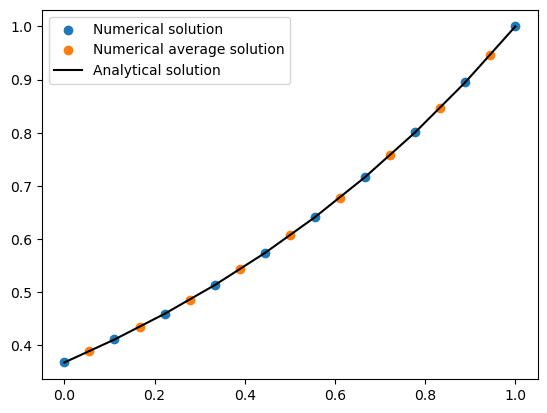

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, flux_sol, label='Numerical solution')
ax.scatter(x_average, flux_average, label='Numerical average solution')

analytical_sol = lambda x: psi_right_initial * np.exp(-sigma_t * (x - x_right_boundary) / mu)
ax.plot(x, analytical_sol(x), label='Analytical solution', color='black')

ax.legend()